# GD02 로이터 데이터셋 분류하기

In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

# num_words
# None, 5000, 20000 이렇게 세 종류로 바꾸어가며 실험했다.

In [ ]:
# 샘플 개수 출력
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [6]:
print(y_train[0])
print(y_test[0])

3
3


In [ ]:
# 클래스의 수
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


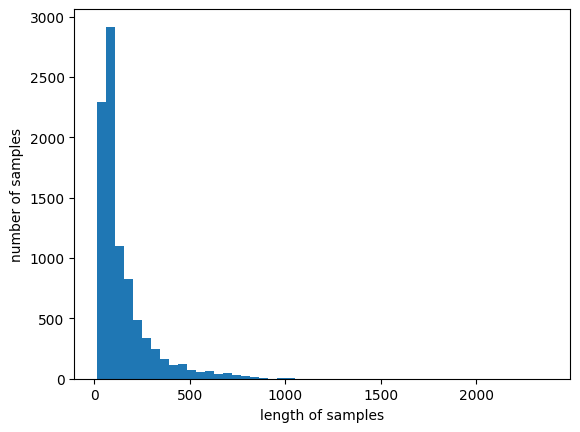

In [8]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

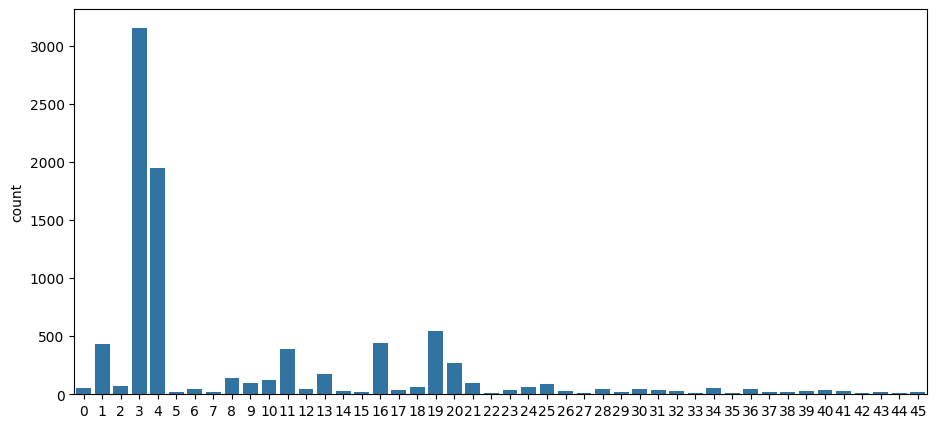

In [ ]:
# 클래스 분포
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [10]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [11]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [12]:
print(word_index['the'], word_index['it'])

1 13


In [ ]:
# 인덱스를 단어에 매핑
index_to_word = { index+3 : word for word, index in word_index.items() }

In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [15]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
# 인덱스를 단어에 매핑하는 예시
for e in [4, 587, 23, 133, 6, 30, 515]:
  print(index_to_word[e])

the
transaction
is
expected
to
be
completed


In [ ]:
# 인덱스 값을 단어로 매핑한 후, 문장으로 복원 (훈련 데이터)
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
x_train = decoded
print(len(x_train))

8982


In [ ]:
# 인덱스 값을 단어로 매핑한 후, 문장으로 복원 (테스트 데이터)
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
x_test = decoded
print(len(x_test))

2246


In [20]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [21]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman <unk> yulo said yulo told reuters a survey d

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 18479)


In [ ]:
# TF-IDF Matrix 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 18479)


In [25]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [26]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

## 여러 모델 사용하기
사용할 모델

나이브 베이즈 분류기, CNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅

In [27]:
# 8개의 모델들을 불러온다.
naive_bayes = MultinomialNB() # 나이브 베이즈
cb = ComplementNB() # CNB
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000) # 로지스틱 회귀
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False) # 선형 서포트 벡터 머신
dicision_tree = DecisionTreeClassifier(max_depth=10, random_state=0) # 결정 트리
forest = RandomForestClassifier(n_estimators=5, random_state=0) # 랜덤 포레스트
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # 그레이디언트 부스팅
voting_classifier = VotingClassifier(estimators= 
 [('lr', lr), ('cb', cb), ('grbt', grbt)], voting='soft') # 보팅

# get all models into a list
models = [naive_bayes, cb, lr, lsvc, dicision_tree, forest, grbt, voting_classifier]

In [28]:
# define a function to fit the model
def fit_model(model, X_train, y_train):
    print(f'{model.__class__.__name__} 모델 학습 중...')
    model.fit(X_train, y_train)
    print('학습 완료!...')
    print()

# fit all models using for statement
for model in models:
    fit_model(model, tfidfv, y_train)

MultinomialNB 모델 학습 중...
학습 완료!...

ComplementNB 모델 학습 중...
학습 완료!...

LogisticRegression 모델 학습 중...
학습 완료!...

LinearSVC 모델 학습 중...


c:\Users\kimcj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


학습 완료!...

DecisionTreeClassifier 모델 학습 중...
학습 완료!...

RandomForestClassifier 모델 학습 중...
학습 완료!...

GradientBoostingClassifier 모델 학습 중...
      Iter       Train Loss   Remaining Time 
         1           1.4325           73.66m
         2       95425.3454           71.94m
         3      105570.5806           70.53m
         4 593224062715434240.0000           70.32m
         5 3774435179954214965190827163532200324919421056207963600650727689765434627016028572886658560929748541266843098466825516760063541248.0000           70.44m
         6 3774435179954214965190827163532200324919421056207963600650727689765434627016028572886658560929748541266843098466825516760063541248.0000           68.99m
         7 1489548743300366321557181456485159125481332787929852889230196243489947621997395490053069671791308532024573494752058897848946370357157414400163840.0000           67.79m
         8 14895487433003663215571814564851591254813327879298528892301962434899476219973954900530696717913085320245734947

In [29]:
# get all model's scores in a dict with its model name
scores = {}
for model in models:
    scores[model.__class__.__name__] = accuracy_score(y_test, model.predict(tfidfv_test))


C:\Users\kimcj\AppData\Local\Temp\ipykernel_12044\3955904138.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)


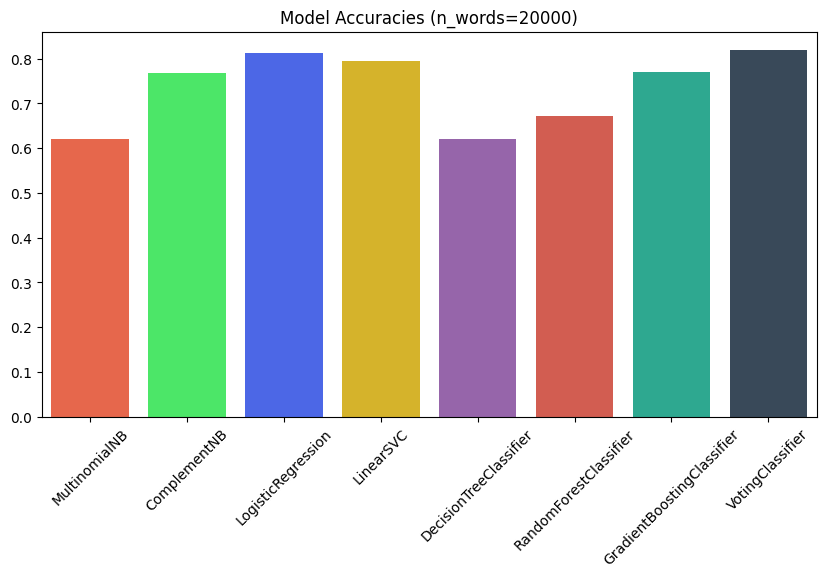

In [34]:
# visualize the result
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#9B59B6', '#E74C3C', '#1ABC9C', '#34495E']
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title('Model Accuracies (n_words=20000)')
plt.show()


In [32]:
# print each accuracy of a model in descending order
for model_name, accuracy in sorted(scores.items(), key=lambda x: x[1], reverse=True):
    print(f'{model_name}: {accuracy}')

VotingClassifier: 0.8192341941228851
LogisticRegression: 0.8121104185218165
LinearSVC: 0.794746215494212
GradientBoostingClassifier: 0.7707034728406055
ComplementNB: 0.7671415850400712
RandomForestClassifier: 0.6714158504007124
DecisionTreeClassifier: 0.6211041852181657
MultinomialNB: 0.6193232413178985


In [33]:
# get the best model
best_model = max(scores, key=scores.get)
print(f'Best Model: {best_model}')
print(f'Accuracy: {scores[best_model]}')

Best Model: VotingClassifier
Accuracy: 0.8192341941228851


## 결과 및 회고

<h5>모든 단어를 사용한 경우, 5000개 단어를 사용한 경우, 20000개 단어를 사용한 경우 이렇게 세 가지로 분석을 했다.</h5>

모든 단어 사용한 모델의 정확도 (내림차순)
- VotingClassifier: 0.8161175422974176
- LogisticRegression: 0.811219946571683
- LinearSVC: 0.7894033837934105
- GradientBoostingClassifier: 0.7680320569902048
- ComplementNB: 0.7649154051647373
- RandomForestClassifier: 0.6544968833481746
- DecisionTreeClassifier: 0.6211041852181657
- MultinomialNB: 0.5997328584149599

5000개 단어를 사용한 모델의 정확도 (내림차순)
- VotingClassifier: 0.8103294746215495
- LogisticRegression: 0.8036509349955476
- LinearSVC: 0.7782724844167409
- ComplementNB: 0.7707034728406055
- GradientBoostingClassifier: 0.767586821015138
- RandomForestClassifier: 0.701246660730187
- MultinomialNB: 0.6731967943009796
- DecisionTreeClassifier: 0.6179875333926982

20000개 단어를 사용한 모델의 정확도 (내림차순)
- VotingClassifier: 0.8192341941228851
- LogisticRegression: 0.8121104185218165
- LinearSVC: 0.794746215494212
- GradientBoostingClassifier: 0.7707034728406055
- ComplementNB: 0.7671415850400712
- RandomForestClassifier: 0.6714158504007124
- DecisionTreeClassifier: 0.6211041852181657
- MultinomialNB: 0.6193232413178985

단어의 개수와 상관없이, VotingClassifier가 다른 분류기보다 가장 성능이 좋다.  
20000개의 단어를 사용했을 때의 VotingClassifier가 다른 개수의 단어를 사용했을 때보다 성능이 좋다.